In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.test.is_gpu_available()

## One Sample

In [23]:
# Load Data
data = np.genfromtxt('./data.csv', delimiter=',')

X = data[:, :-1]
y = data[:, -1:]
N_samples = X.shape[0]
X = np.c_[np.ones((N_samples,1)), X]

# theta
theta = tf.Variable([[0.04], 
                     [-0.34]], 
                    dtype=tf.float64)
# forward
def predict(X, theta):
  return tf.transpose(theta)@X

In [24]:
# some params
lr = 0.01
epochs = 20
losses = []

for epoch in range(epochs):
  for x_train, y_train in zip(X, y):
    x_train = x_train.reshape(2,1)

    with tf.GradientTape(persistent=True) as tape:
      # predict
      y_hat = predict(x_train, theta)

      # Loss Function
      loss = tf.square(y_hat - y_train)
    
    # debug
    losses.append(loss[0][0].numpy())

    # Gradient
    dtheta = tape.gradient(loss, theta)

    # Update weights
    theta.assign_sub(lr*dtheta)

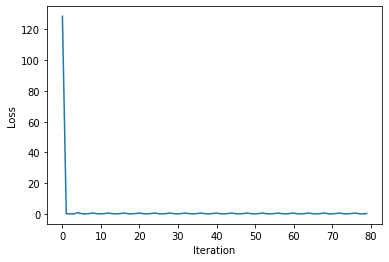

In [25]:
# Visualize 

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Training N Samples

In [ ]:
# Load Data
data = np.genfromtxt('./data.csv', delimiter=',')

X = data[:, :-1]
y = data[:, -1:]
N_samples = X.shape[0]
X = np.c_[np.ones((N_samples,1)), X]

# theta
theta = tf.Variable([[0.04], 
                     [-0.34]], 
                    dtype=tf.float64)
# forward
def predict(X, theta):
  return tf.transpose(theta)@X

In [26]:
# some params
lr = 0.01
epochs = 20
losses = []

for epoch in range(epochs):
  with tf.GradientTape(persistent=True) as tape:
    # predict
    y_hat = predict(x_train, theta)

    # Loss Function
    loss = tf.square(y_hat - y_train)
  
  # debug
  losses.append(loss[0][0].numpy())

  # Gradient
  dtheta = tape.gradient(loss, theta)

  # Update weights
  theta.assign_sub(lr*dtheta)

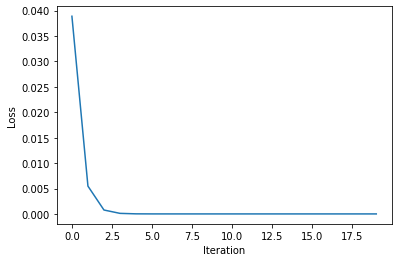

In [27]:
# Visualize 

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()